In [1]:
import numpy as np
import sys
sys.path.append("../")

In [2]:
import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/paper_utils.py'>

In [9]:
import importlib
import src.plot as myplot
importlib.reload(myplot)



<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/plot.py'>

# Convergence plot C

digit 0 and 1

In [3]:
# # need to read in mcm A stuff
# # probabilities for that for digit 0 and 1 for seeing another dataset

# # main function for convergence B
# def letter_means_stds(letter, sample_sizes, nr_runs, digit,recreate_letter):
#     counts_sample, mcm_sample = load_counts_mcm(digit,nr_runs,sample_sizes,letter)


#     ms_all = np.empty((len(sample_sizes),nr_runs,2))
#     for sample_idx, sample_size in enumerate(sample_sizes):
#         m_s_run = np.empty((nr_runs,2))
#         for run_idx in range(nr_runs):
#             n_icc = len(counts_sample[sample_idx][run_idx][digit])

#             sample_recreate = recreate_dataset(recreate_letter, sample_size)

#             counts_observe_X, ranks = generate_counts_ranks_singlerun_singlesample(counts_sample, mcm_sample, sample_recreate, run_idx, sample_idx)
#             sum_of_count = np.sum(counts_sample[sample_idx][run_idx][0][0])
#             # mean probabilities over 100 B samples for some mcm
#             m,s = probs_mean_std(counts_observe_X, ranks, sum_of_count,sample_size, n_icc) 
#             ms_all[sample_idx, run_idx, :] = [m,s]

#     return ms_all


In [5]:
digit = 0
nr_runs = 99
sample_sizes = [100, 1000,2000,3000]


stats_a_seeB = utils.letter_means_stds("A", sample_sizes, nr_runs, digit,recreate_letter="B", data_size=894)

In [38]:
# get 5423 sample
import json
import os

def here_load_counts_mcm(digit, nr_runs, sample_sizes):
    """For all sample sizes, load the counts and mcms for a specific digit and a pool of samples specifid by the letter."""
    samples_path = "../OUTPUT/sample_sizes"

    fname = "Counts_"
    counts_sample = []
    for s, sample_size in enumerate(sample_sizes):
        counts_runs = []
        counts_path = os.path.join(samples_path, str(sample_size), "Counts")
        for i in range(len(os.listdir(counts_path))):
            with open(os.path.join(counts_path, fname+str(i)+ ".json")) as f:
                    counts_runs.append(json.load(f))
        
        counts_sample.append(counts_runs)

    fname = "MCMs_"
    mcm_sample = []
    for s, sample_size in enumerate(sample_sizes):
        mcm_runs = []
        mcms_path = os.path.join(samples_path, str(sample_size), "MCMs")
        for i in range(len(os.listdir(mcms_path))):
            with open(os.path.join(mcms_path, fname+str(i)+ ".json")) as f:
                    # samples[sample_size] = json.load(f)
                    mcm_runs.append(json.load(f))
        mcm_sample.append(mcm_runs)

    return counts_sample, mcm_sample
def load_test_data():
        all_data_path="../INPUT_all/data/testdata_separated"
        file = "test-images-unlabeled-0.dat"
        inp = np.loadtxt(os.path.join(all_data_path,file), dtype="str")
        return inp

def letter_means_stds(sample_sizes, nr_runs, digit):
    counts_sample, mcm_sample = here_load_counts_mcm(digit,nr_runs,sample_sizes)


    ms_all = np.empty((len(sample_sizes),nr_runs,2))
    for sample_idx, sample_size in enumerate(sample_sizes):
        m_s_run = np.empty((nr_runs,2))
    
        for run_idx in range(nr_runs):
            n_icc = len(counts_sample[sample_idx][run_idx][digit])
        #     sample_recreate = utils.recreate_dataset(recreate_letter, int(data_size))
            # load test data instead of recreate
            sample_recreate = load_test_data()
            

            counts_observe_X, ranks = utils.generate_counts_ranks_singlerun_singlesample(counts_sample, mcm_sample, sample_recreate, run_idx, sample_idx)
            sum_of_count = np.sum(counts_sample[sample_idx][run_idx][0][0])
            # mean probabilities over 100 B samples for some mcm
            m,s = utils.probs_mean_std(counts_observe_X, ranks, sum_of_count,892, n_icc) 
            ms_all[sample_idx, run_idx, :] = [m,s]

    return ms_all



In [39]:
sample_sizes = [5423]
nr_runs = 49
digit = 0
res = letter_means_stds(sample_sizes, nr_runs, digit)

In [44]:
res[0,:,0].shape

(49,)

In [ ]:
res[0,:,0].shape, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


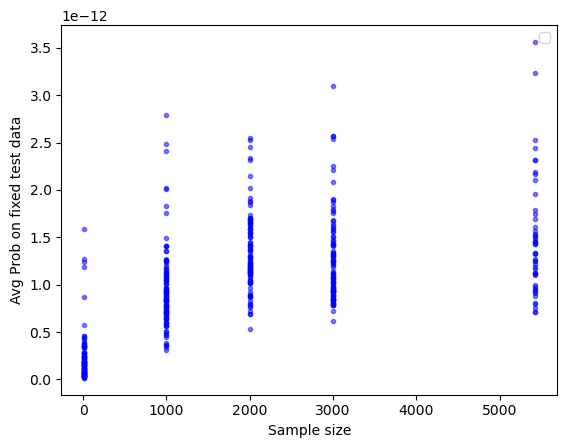

In [49]:
import matplotlib.pyplot as plt

# Define the x-axis values

nr_runs = 99
# Define the sample sizes
sample_sizes = [10, 1000, 2000, 3000]

# Iterate over the sample sizes
for i, sample_size in enumerate(sample_sizes):
    # Get the mean and std values for the current sample size
    means = stats_a_seeB[i,:,0]
    stds = stats_a_seeB[i,:,1]
    
    # Plot the error bars
    # plt.errorbar(x, means, yerr=stds, label=f'Sample Size: {sample_size}')
    plt.scatter(np.full(nr_runs , fill_value=sample_size), means, marker=".", color="blue", alpha= .5)

plt.scatter(np.full(49 , fill_value=5423), res[0,:,0], marker=".", color="blue", alpha= .5)


# Add labels and legend
plt.xlabel('Sample size')
plt.ylabel('Avg Prob on fixed test data')
plt.legend()

# Show the plot
plt.show()

# should not be a see b but see same size of data all the time, take 892 (=test data size) samples from B

In [53]:
res[0,:,0]

array([1.42459784e-12, 1.24915146e-12, 9.80483384e-13, 2.10068884e-12,
       9.23017671e-13, 1.33703396e-12, 2.16474865e-12, 1.78968768e-12,
       1.10169524e-12, 7.09807421e-13, 1.11211828e-12, 1.60985458e-12,
       1.16946504e-12, 1.50433176e-12, 8.83994019e-13, 1.52992186e-12,
       1.49385139e-12, 1.69137838e-12, 1.74638834e-12, 1.32423086e-12,
       8.05305885e-13, 9.53862897e-13, 1.52668277e-12, 1.45241568e-12,
       7.94221603e-13, 1.33876983e-12, 9.40174815e-13, 7.16200660e-13,
       2.18920565e-12, 1.12379189e-12, 3.23589605e-12, 1.44508516e-12,
       1.95980351e-12, 1.45815794e-12, 3.56108465e-12, 1.00029045e-12,
       2.31564262e-12, 9.09405930e-13, 1.21795961e-12, 1.27403439e-12,
       2.31347667e-12, 1.24951548e-12, 1.12457885e-12, 2.52581096e-12,
       7.50851019e-13, 1.42982217e-12, 1.18567115e-12, 2.44051656e-12,
       1.56252575e-12])

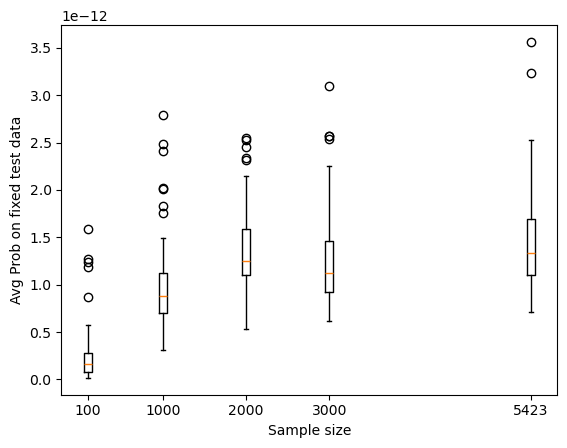

In [54]:
import matplotlib.pyplot as plt

# Define the x-axis values


# Define the sample sizes
sample_sizes = [100, 1000, 2000, 3000]
# Iterate over the sample sizes
for i, sample_size in enumerate(sample_sizes):
    # Get the mean values for the current sample size
    means = stats_a_seeB[i,:,0]
    
    # Create a box plot
    plt.boxplot(means, positions=[sample_size], widths=100)

plt.boxplot(res[0,:,0], positions=[5423], widths=100)

# Add labels and legend
plt.xlabel('Sample size')
plt.ylabel('Avg Prob on fixed test data')

# Show the plot
# plt.xlim((-100,3100))
plt.show()



# should not be a see b but see same size of data all the time, take 892 (=test data size) samples from B

In [ ]:
stats_a_seeB[...,0].shape

(4, 50)

In [ ]:
import pandas as pd
import numpy as np

# Read the first file from the directory
file_path = "../INPUT_all/data/testdata_separated/test-images-unlabeled-0.dat"

file = np.loadtxt(file_path, dtype=str)
file.shape




(892,)

-----------------------